# Tutorial: optimal binning with binary target - LocalSolver

To get us started, let's load the application_train.csv file from the Kaggle's competition https://www.kaggle.com/c/home-credit-default-risk/data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/kaggle/HomeCreditDefaultRisk/application_train.csv", engine='c')

We choose a variable to discretize and the binary target.

In [3]:
variable = "REGION_POPULATION_RELATIVE"
x = df[variable].values
y = df.TARGET.values

Import and instantiate an ``OptimalBinning`` object class. We pass the variable name, its data type, and a solver, in this case, we choose the commercial solver LocalSolver. Note that LocalSolver requires a time limit, which is set to 20 seconds (LocalSolver 10.0). Besides, for this example, we require a more granular binning, therefore we allow a large number of prebins with small size.

To use LocalSolver follow the avaiable instructions:
https://www.localsolver.com/docs/last/quickstart/solvingyourfirstmodelinpython.html

In [4]:
from optbinning import OptimalBinning

In [5]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="ls", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=20)

We fit the optimal binning object with arrays ``x`` and ``y``.

In [6]:
optb.fit(x, y)

Push initial solution 100%
Model:  expressions = 79028, decisions = 309, constraints = 6161, objectives = 1
Param:  time limit = 20 sec, no iteration limit

[objective direction ]:     maximize

[  0 sec,       0 itr]:            0
[ optimality gap     ]:      100.00%
[  1 sec,       0 itr]:            0
[  2 sec,    1650 itr]:        34776
[  3 sec,    6276 itr]:        37297
[  4 sec,    6276 itr]:        37297
[  5 sec,    8516 itr]:        37297
[  6 sec,   10771 itr]:        37297
[  7 sec,   12813 itr]:        37297
[  8 sec,   15256 itr]:        37305
[  9 sec,   17634 itr]:        37305
[ 10 sec,   20136 itr]:        37305
[ optimality gap     ]:       82.27%
[ 11 sec,   22303 itr]:        37305
[ 12 sec,   24608 itr]:        37729
[ 13 sec,   26865 itr]:        37758
[ 14 sec,   28828 itr]:        37758
[ 15 sec,   33133 itr]:        37758
[ 16 sec,   33133 itr]:        37758
[ 17 sec,   35139 itr]:        37758
[ 18 sec,   37028 itr]:        37758
[ 19 sec,   40000 itr]:     

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='ls',
               special_codes=None, split_digits=None, time_limit=20,
               user_splits=None, user_splits_fixed=None, ...)

You can check if an optimal or feasible solution has been found via the ``status`` attribute:

In [7]:
optb.status

'FEASIBLE'

In [8]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08180326
    IV (Jeffrey)             0.03776231
    JS (Jensen-Shannon)      0.00465074
    Hellinger                0.00468508
    Triangular               0.01833822
    KS                       0.06087208
    HHI                      0.23425608
    HHI (normalized)         0.16464300
    Cramer's V               0.05102627
    Quality score            0.06257516

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]     P[B > A]
        0      1     1.445262 2.292897e-01  1.013041e-01 8.986959e-01
        1      2   158.939080 1.929529e-36 1.179082e-218 1.000000e+00
        2      3   131.200666 2.238000e-30  1.000000e+00 1.110223e-16
        3      4     0.878638 3.485750e-01  8.240457e-01 1.759543e-01
        4      5    14.92540

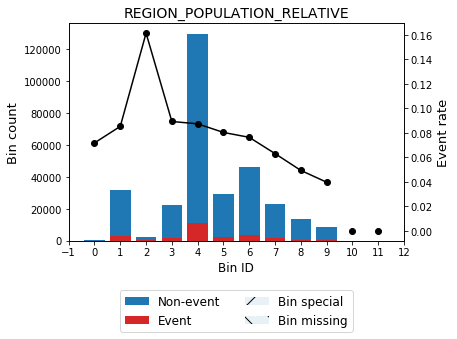

In [9]:
binning_table.plot(metric="event_rate")

In [10]:
optb.information(print_level=1)

optbinning (Version 0.9.2)
Copyright (c) 2019-2021 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : FEASIBLE                        

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  ls
    Number of iterations               40000

  Timing
    Total time                         21.43 sec
    Pre-processing                      0.01 sec   (  0.05%)
    Pre-binning                         0.50 sec   (  2.35%)
    Solver                             20.91 sec   ( 97.59%)
    Post-processing                     0.00 sec   (  0.00%)



Computing the optimal binning starting with a large number of prebins might be challenging in some situations, therefore solvers such as LocalSolver are suitable to find quality feasible solutions in a reasonable amount of time. However, if LocalSolver is not available we can always try solver options "cp" or "mip".

#### Constraint programming solver

First, we keep the 5 seconds time limit:

In [11]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=5)

In [12]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=5,
               user_splits=None, user_splits_fixed=None, ...)

The status is "UNKNOWN" therefore nor feasible or optimal solutions was found in 5 seconds.

In [13]:
optb.status

'UNKNOWN'

In [14]:
optb.information(print_level=1)

optbinning (Version 0.9.2)
Copyright (c) 2019-2021 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : UNKNOWN                         

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0



We increase the time limit to 30 seconds.

In [15]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=30)

In [16]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=30,
               user_splits=None, user_splits_fixed=None, ...)

In 30 seconds we found a feasible solution

In [17]:
optb.status

'FEASIBLE'

In [18]:
optb.information(print_level=1)

optbinning (Version 0.9.2)
Copyright (c) 2019-2021 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : FEASIBLE                        

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  cp
    Number of booleans                  3155
    Number of branches                 28213
    Number of conflicts                 6885
    Objective value                    37367
    Best objective bound               74233

  Timing
    Total time                         49.50 sec
    Pre-processing                      0.00 sec   (  0.01%)
    Pre-binning                         0.45 sec   (  0.90%)
    Solver                             49.05 sec   ( 99.09%)
      model generation                 19.04 sec   ( 38.83%)
      optimizer                        30.00 sec   ( 61.17%)
    Post-processing                     0.

In [19]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08891470
    IV (Jeffrey)             0.03737164
    JS (Jensen-Shannon)      0.00461702
    Hellinger                0.00464395
    Triangular               0.01825927
    KS                       0.06087208
    HHI                      0.19466583
    HHI (normalized)         0.13271705
    Cramer's V               0.04978528
    Quality score            0.00058822

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1     1.221574 2.690519e-01 1.202075e-01 8.797925e-01
        1      2     3.537222 6.000588e-02 3.120268e-02 9.687973e-01
        2      3     0.078781 7.789566e-01 3.875777e-01 6.124223e-01
        3      4     0.190265 6.626959e-01 3.352569e-01 6.647431e-01
        4      5    26.771144 2.2

The current solution is IV = 0.03514331, compared to the LocalSolver solver solution 0.03776231. Let us increase the time limit to 200 seconds.

In [20]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=200)

In [21]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=200,
               user_splits=None, user_splits_fixed=None, ...)

The optimal solution is found within the time limit.

In [22]:
optb.status

'OPTIMAL'

In [23]:
optb.information(print_level=1)

optbinning (Version 0.9.2)
Copyright (c) 2019-2021 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  cp
    Number of booleans                  3155
    Number of branches                165953
    Number of conflicts                75652
    Objective value                    37758
    Best objective bound               37758

  Timing
    Total time                        148.19 sec
    Pre-processing                      0.00 sec   (  0.00%)
    Pre-binning                         0.44 sec   (  0.30%)
    Solver                            147.75 sec   ( 99.70%)
      model generation                 17.90 sec   ( 12.12%)
      optimizer                       129.84 sec   ( 87.88%)
    Post-processing                     0.

In [24]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08180326
    IV (Jeffrey)             0.03776231
    JS (Jensen-Shannon)      0.00465074
    Hellinger                0.00468508
    Triangular               0.01833822
    KS                       0.06087208
    HHI                      0.23425608
    HHI (normalized)         0.16464300
    Cramer's V               0.05102627
    Quality score            0.06257516

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]     P[B > A]
        0      1     1.445262 2.292897e-01  1.013041e-01 8.986959e-01
        1      2   158.939080 1.929529e-36 1.179082e-218 1.000000e+00
        2      3   131.200666 2.238000e-30  1.000000e+00 1.110223e-16
        3      4     0.878638 3.485750e-01  8.240457e-01 1.759543e-01
        4      5    14.92540

The optimal solution is IV = 0.03776231, matching the LocalSolver solver solution 0.03776231. 

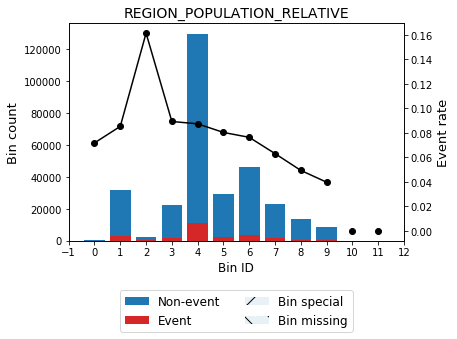

In [25]:
binning_table.plot(metric="event_rate")